# Getting the elemental composition from SIRIUS and CANOPUS files

<p style='text-align: justify;'>
<b>Authors </b>:Ralph Torres (rrtorres@ucsd.edu), Abzer Kelminal (abzer.shah@uni-tuebingen.de) <br>
<b>Use case</b>: Van Krevelen Plots created using the sirius and canopus data <br>
<b>Input file format</b>: .tsv tables of sirius and canopus data <br>
<b>Outputs</b>: .svg plots  <br>
<b>Dependencies</b>: R version 4.2.2 (2022-10-31 ucrt) and libraries  ggplot2, dplyr, varhandle, reshape2 </p>
<br>
The elemental information from SIRIUS and CANOPUS will be used to make Van Krevelen Plots and in Cytoscape to visualise the molecular network with the elemental composition of the molecules

In [63]:
#Last Updated
Sys.time()

[1] "2023-01-11 11:25:41 CET"

In [ ]:
#install.packages(c("dplyr","tidyr","stringr","ggthemes","ggplot2","svglite"))

In [2]:
library(dplyr)
library(tidyr)
library(stringr)
library(ggthemes)
library(ggplot2)
library(svglite)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




#  1) Loading in the necessary files

<font color="red"> Load feature table and combine with sirius and canopus info </font>

In [3]:
si_url <- "https://raw.githubusercontent.com/Functional-Metabolomics-Lab/CCE_Data-Analysis/main/NewFiles_Oct2022/formula_identifications_sirius_new.tsv"
ca_url <- "https://raw.githubusercontent.com/Functional-Metabolomics-Lab/CCE_Data-Analysis/main/NewFiles_Oct2022/canopus_formula_summary_new.tsv"

In [4]:
sir <- read.csv(si_url, sep = "\t", header = T, check.names = F)
can <- read.csv(ca_url, sep = "\t", header = T, check.names = F)

In [5]:
head(sir, n=3)
dim(sir)

,rank,molecularFormula,adduct,precursorFormula,SiriusScore,TreeScore,IsotopeScore,numExplainedPeaks,explainedIntensity,medianMassErrorFragmentPeaks(ppm),medianAbsoluteMassErrorFragmentPeaks(ppm),massErrorPrecursor(ppm),lipidClass,ionMass,retentionTimeInSeconds,id
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,1,C37H70NO8P,[M + Na]+,C37H70NO8P,11023.342,11020.268,3.0738023,28,0.9799012,0.5606802,0.8967445,0.3571320,PE(16:1_16:1),710.4734,784.5330,10512_CCE1706_MZmine3_SIRIUS_fixed_41908
2,2,C43H74NO8P,[M + Na]+,C43H74NO8P,10032.180,10032.180,0.0000000,34,0.9455949,0.7469075,1.0807981,0.6490260,PE(22:6_16:0),786.5049,784.3227,10496_CCE1706_MZmine3_SIRIUS_fixed_41878
3,3,C18H27NO3,[M + O + H]+,C18H27NO4,9098.027,9097.381,0.6461848,51,0.9362963,-0.2371063,1.1838410,-0.9260956,Cer(d10:3_8:2),322.2010,418.5567,4893_CCE1706_MZmine3_SIRIUS_fixed_24890


[1] 8799   16

In [6]:
head(can, n=3)
dim(can)

,id,molecularFormula,adduct,NPC#pathway,NPC#pathway Probability,NPC#superclass,NPC#superclass Probability,NPC#class,NPC#class Probability,ClassyFire#most specific class,ClassyFire#most specific class Probability,ClassyFire#level 5,ClassyFire#level 5 Probability,ClassyFire#subclass,ClassyFire#subclass Probability,ClassyFire#class,ClassyFire#class Probability,ClassyFire#superclass,ClassyFire#superclass probability,ClassyFire#all classifications
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,3186_CCE1706_MZmine3_SIRIUS_fixed_14993,C18H27NO2,[M + H]+,Alkaloids,0.9430449,Lysine alkaloids,0.8096346,Quinolizidine alkaloids,0.7394908,Piperidines,0.6188836,,NA,,NA,Piperidines,0.6188836,Organoheterocyclic compounds,0.9969913,Organic compounds; Organoheterocyclic compounds; Alcohols and polyols; Piperidines; Carboxylic acids and derivatives; Organonitrogen compounds; Organooxygen compounds; Cyclic alcohols and derivatives; Tertiary alcohols; Carbonyl compounds; Amines; Organic oxides; Azacyclic compounds; Hydrocarbon derivatives; Organopnictogen compounds; Organic oxygen compounds; Organic nitrogen compounds; Chemical entities
2,2125_CCE1706_MZmine3_SIRIUS_fixed_8297,C10H18O7,[M + Na]+,Fatty acids,0.7239199,Fatty Acids and Conjugates,0.4296836,Dicarboxylic acids,0.2417680,Glycosyl compounds,0.5183357,Glycosyl compounds,0.5183357,Carbohydrates and carbohydrate conjugates,0.8404632,Organooxygen compounds,0.9999981,Organic oxygen compounds,1.0000000,Organic compounds; Organoheterocyclic compounds; Carbohydrates and carbohydrate conjugates; Lipids and lipid-like molecules; Alcohols and polyols; Ethers; Fatty acids and conjugates; Organic acids and derivatives; Carboxylic acids and derivatives; Primary alcohols; Organooxygen compounds; Hydroxy fatty acids; Hydroxy acids and derivatives; Monocarboxylic acids and derivatives; Carboxylic acids; Monosaccharides; Secondary alcohols; Carbonyl compounds; Glycosyl compounds; Polyols; Fatty Acyls; Organic oxides; Oxacyclic compounds; Hydrocarbon derivatives; Organic oxygen compounds; Chemical entities
3,1770_CCE1706_MZmine3_SIRIUS_fixed_6320,C12H24N2O3,[M + H]+,Amino acids and Peptides,0.9995925,Small peptides,0.9996709,Dipeptides,0.9999439,Dipeptides,0.9998232,Peptides,0.9979240,"Amino acids, peptides, and analogues",0.9999982,Carboxylic acids and derivatives,0.9999992,Organic acids and derivatives,1.0000000,"Organic compounds; Lipids and lipid-like molecules; Amino acids, peptides, and analogues; Alpha amino acids and derivatives; Fatty acids and conjugates; Organic acids and derivatives; Carboxylic acids and derivatives; Organonitrogen compounds; Organooxygen compounds; Fatty amides; Branched fatty acids; Amino acids and derivatives; Peptides; Monoalkylamines; Carboxylic acid amides; Carboxylic acid derivatives; N-acyl amines; Monocarboxylic acids and derivatives; N-acyl-alpha amino acids and derivatives; Carboxylic acids; Secondary carboxylic acid amides; Carbonyl compounds; Alpha amino acid amides; N-acyl-alpha amino acids; Amines; Primary amines; Methyl-branched fatty acids; Fatty Acyls; Organic oxides; N-acyl-L-alpha-amino acids; Hydrocarbon derivatives; Amino acids; Leucine and derivatives; Isoleucine and derivatives; Organopnictogen compounds; Organic oxygen compounds; Organic nitrogen compounds; Dipeptides; Chemical entities"


[1] 8389   20

# 2) Arranging Sirius and Canopus files in the right format:

In [7]:
#Arranging Sirius and Canopus files in the right format for further analysis:

#Renaming certain column headers to retain different molecular formulas
sir <- rename(sir, 'Sirius_molecularFormula' = 'molecularFormula')
can <- rename(can, 'Canopus_molecularFormula' = 'molecularFormula')

#Merging both Canopus and Sirius dataframes by id
all <- merge(can, sir, by = 'id', all = TRUE)

In [8]:
head(all, n=3)

,id,Canopus_molecularFormula,adduct.x,NPC#pathway,NPC#pathway Probability,NPC#superclass,NPC#superclass Probability,NPC#class,NPC#class Probability,ClassyFire#most specific class,⋯,TreeScore,IsotopeScore,numExplainedPeaks,explainedIntensity,medianMassErrorFragmentPeaks(ppm),medianAbsoluteMassErrorFragmentPeaks(ppm),massErrorPrecursor(ppm),lipidClass,ionMass,retentionTimeInSeconds
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,10_CCE1706_MZmine3_SIRIUS_fixed_21,C11H16O4,[M - H2O + H]+,Terpenoids,0.2954699,Monoterpenoids,0.4026197,Dicarboxylic acids,0.2382341,Branched fatty acids,⋯,156.252049,0,38,0.9248666,0.6149183,1.030730,-9.231491e+04,,195.1014,26.013
2,100_CCE1706_MZmine3_SIRIUS_fixed_465,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,4.552935,0,2,0.6769016,2.2515893,2.251589,-1.019508e+00,,338.7965,38.026
3,1000_CCE1706_MZmine3_SIRIUS_fixed_2802,C15H25NO3,[M + H]+,Alkaloids,0.5740815,Linear polyketides,0.1926119,3-acyl tetramic acids,0.4298434,Lactams,⋯,212.163034,0,47,0.6934251,1.9726128,1.972613,-3.236272e-01,,268.1906,168.413


In [9]:
# Indexing feature ID out of id
all <- separate(data = all, col = id, into = c(NA, NA, NA, NA, NA, 'row.ID'), sep = '_')
head(all, n=3)

,row.ID,Canopus_molecularFormula,adduct.x,NPC#pathway,NPC#pathway Probability,NPC#superclass,NPC#superclass Probability,NPC#class,NPC#class Probability,ClassyFire#most specific class,⋯,TreeScore,IsotopeScore,numExplainedPeaks,explainedIntensity,medianMassErrorFragmentPeaks(ppm),medianAbsoluteMassErrorFragmentPeaks(ppm),massErrorPrecursor(ppm),lipidClass,ionMass,retentionTimeInSeconds
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,21,C11H16O4,[M - H2O + H]+,Terpenoids,0.2954699,Monoterpenoids,0.4026197,Dicarboxylic acids,0.2382341,Branched fatty acids,⋯,156.252049,0,38,0.9248666,0.6149183,1.030730,-9.231491e+04,,195.1014,26.013
2,465,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,4.552935,0,2,0.6769016,2.2515893,2.251589,-1.019508e+00,,338.7965,38.026
3,2802,C15H25NO3,[M + H]+,Alkaloids,0.5740815,Linear polyketides,0.1926119,3-acyl tetramic acids,0.4298434,Lactams,⋯,212.163034,0,47,0.6934251,1.9726128,1.972613,-3.236272e-01,,268.1906,168.413


Indexing molecular formulas into C, N, H, P, O, S, etc.:

In [10]:
# First, Sirius molecular formulas

#splits the molecular formula if alphabets are present in it such as 'C13' 'H22' 'S'
mols <- regmatches(all$Sirius_molecularFormula, gregexpr("\\b[A-Z][a-z]*\\d*", all$Sirius_molecularFormula))

#adds 1 to molecular names when there is no number next to the alphabet. For ex:'C13' 'H22' 'S1'
mols <- lapply(mols, function(a) paste0(a, ifelse(grepl("[^0-9]$", a), "1", "")))#ASCII code [^0-9] --> Non-digits

#Creates a list where each list elements has the atom counts with their names set as, for ex: C, H, S
n_atoms <- lapply(mols, function(mol) setNames(as.integer(gsub("\\D", "", mol)), gsub("\\d", "", mol)))

#unlists the atomcounts and get all the atom names into 'atoms' character string
atoms <- unique(unlist(sapply(n_atoms, names)))
                     
#gets the corresponding atom counts into 'atoms', making it a matrix
atoms <- sapply(atoms, function(atom) sapply(n_atoms, function(a) if (atom %in% names(a)) a[atom] else 0))
rownames(atoms) <- all$Sirius_molecularFormula
head(atoms)
                                             
s_form <- as.data.frame(atoms) #sirus formula
rownames(s_form) <- NULL
colnames(s_form) <- paste(colnames(s_form), "Sirius", sep = '_')

sf <- cbind(all, s_form) #sirius final

,C,H,O,P,S,N,F,Cl,B,Br,I
C11H14O3,11,14,3,0,0,0,0,0,0,0,0
CH3O5P3S4,1,3,5,3,4,0,0,0,0,0,0
C15H25NO3,15,25,3,0,0,1,0,0,0,0,0
C18H38O4,18,38,4,0,0,0,0,0,0,0,0
C27H49NO3,27,49,3,0,0,1,0,0,0,0,0
C36H63N11O4,36,63,4,0,0,11,0,0,0,0,0


In [11]:
#Next, Canopus molecular formulas
mols <- regmatches(sf$Canopus_molecularFormula, gregexpr("\\b[A-Z][a-z]*\\d*", sf$Canopus_molecularFormula))
mols <- lapply(mols, function(a) paste0(a, ifelse(grepl("[^0-9]$", a), "1", "")))

n_atoms <- lapply(mols, function(mol) setNames(as.integer(gsub("\\D", "", mol)), gsub("\\d", "", mol)))

atoms <- unique(unlist(sapply(n_atoms, names)))
atoms <- sapply(atoms, function(atom) sapply(n_atoms, function(a) if (atom %in% names(a)) a[atom] else 0))
rownames(atoms) <- sf$Canopus_molecularFormula
head(atoms)

cf <- as.data.frame(atoms) #canopus formula
rownames(cf) <- NULL
colnames(cf) <- paste(colnames(cf), "Canopus", sep = '_')

,C,H,O,N,S,P,F,Cl,B,Br,I
C11H16O4,11,16,4,0,0,0,0,0,0,0,0
NA,0,0,0,0,0,0,0,0,0,0,0
C15H25NO3,15,25,3,1,0,0,0,0,0,0,0
C18H38O4,18,38,4,0,0,0,0,0,0,0,0
C27H49NO3,27,49,3,1,0,0,0,0,0,0,0
C36H63N11O4,36,63,4,11,0,0,0,0,0,0,0


In [12]:
fin <- cbind(sf, cf) #combining both sirius and canopus formulae into a final dataframe
head(fin, n=3)

,row.ID,Canopus_molecularFormula,adduct.x,NPC#pathway,NPC#pathway Probability,NPC#superclass,NPC#superclass Probability,NPC#class,NPC#class Probability,ClassyFire#most specific class,⋯,H_Canopus,O_Canopus,N_Canopus,S_Canopus,P_Canopus,F_Canopus,Cl_Canopus,B_Canopus,Br_Canopus,I_Canopus
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21,C11H16O4,[M - H2O + H]+,Terpenoids,0.2954699,Monoterpenoids,0.4026197,Dicarboxylic acids,0.2382341,Branched fatty acids,⋯,16,4,0,0,0,0,0,0,0,0
2,465,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0,0,0,0,0,0,0,0,0,0
3,2802,C15H25NO3,[M + H]+,Alkaloids,0.5740815,Linear polyketides,0.1926119,3-acyl tetramic acids,0.4298434,Lactams,⋯,25,3,1,0,0,0,0,0,0,0


# Van Krevelen Plots:
<p style='text-align: justify;'>  
The Van Krevelen (vK) plot is used to to characterize complex organic compounds by the ratio of its macroelements (C,H,O,N,S,P). In order to do that, we first need to convert the accurate mass measurements obtained using mass spectrometer into elemental forms. This vK plot is commonly used as a 2D plot to visualise different elemental ratios against each other. For example, to have a broad overview of different compound categories such as carbohydrates, lipids, and to observe the presence of any biochemical transformations, it is common to plot VK plot with O/C against H/C $^{[1]}$. 
<p style='text-align: justify;'>  
Here, we get the elemetal ratios as well as average carbon oxidation (C_ox). C_ox is a dogma of Earth's carbon cycle. It typically ranges between -4 and +4. However, for most organic compounds, its C_ox ranges from -2 to +3 $^{[2]}$.

In [13]:
df <- fin

In [14]:
#C:N, O:C, H:C and average C oxidation columns using only Sirius formulas
df$C_N <- df$C_Sirius / df$N_Sirius
df$O_C <- df$O_Sirius / df$C_Sirius
df$H_C <- df$H_Sirius / df$C_Sirius
df$avCox <- -((1*df$H_Sirius) - (3*df$N_Sirius) - (2*df$O_Sirius) + (5*df$P_Sirius) -(2*df$S_Sirius))/(df$C_Sirius)

In [15]:
head(df, n=3)

,row.ID,Canopus_molecularFormula,adduct.x,NPC#pathway,NPC#pathway Probability,NPC#superclass,NPC#superclass Probability,NPC#class,NPC#class Probability,ClassyFire#most specific class,⋯,P_Canopus,F_Canopus,Cl_Canopus,B_Canopus,Br_Canopus,I_Canopus,C_N,O_C,H_C,avCox
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21,C11H16O4,[M - H2O + H]+,Terpenoids,0.2954699,Monoterpenoids,0.4026197,Dicarboxylic acids,0.2382341,Branched fatty acids,⋯,0,0,0,0,0,0,Inf,0.2727273,1.272727,-0.7272727
2,465,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0,0,0,0,0,0,Inf,5.0000000,3.000000,0.0000000
3,2802,C15H25NO3,[M + H]+,Alkaloids,0.5740815,Linear polyketides,0.1926119,3-acyl tetramic acids,0.4298434,Lactams,⋯,0,0,0,0,0,0,15,0.2000000,1.666667,-1.0666667


In [16]:
#Only using Sirius formulas for cutoff, creating van krevelen data frame and cutoffs.
#Only selecting formulas that make sense molecularly (chemically) 
#Cutoff will be C/N < 4 ; O/C > 2; H/C > 2.5

df_vk <- df %>% filter(avCox > -4 & avCox < 4 & O_C <2 & H_C < 2.5 & C_N > 4)

In [33]:
write.csv(df_vk,"Sirius_Canopus_elemental_info.csv")

In [17]:
range(df_vk$avCox) #to see the min and max of avCox

[1] -2.3  3.0

## Visualing vK-plots with different labels:

Now , we can visualise vK plots with different lables such as: relative abundance of Carbon, with Superclass labels, with molecular formula etc.

In [20]:
dim(df_vk)
colnames(df_vk)

[1] 7854   61

[1] "row.ID"                                    
 [2] "Canopus_molecularFormula"                  
 [3] "adduct.x"                                  
 [4] "NPC#pathway"                               
 [5] "NPC#pathway Probability"                   
 [6] "NPC#superclass"                            
 [7] "NPC#superclass Probability"                
 [8] "NPC#class"                                 
 [9] "NPC#class Probability"                     
[10] "ClassyFire#most specific class"            
[11] "ClassyFire#most specific class Probability"
[12] "ClassyFire#level 5"                        
[13] "ClassyFire#level 5 Probability"            
[14] "ClassyFire#subclass"                       
[15] "ClassyFire#subclass Probability"           
[16] "ClassyFire#class"                          
[17] "ClassyFire#class Probability"              
[18] "ClassyFire#superclass"                     
[19] "ClassyFire#superclass probability"         
[20] "ClassyFire#all classifications"            
[21] "rank"                                      
[22] "Sirius_molecularFormula"                   
[23] "adduct.y"                                  
[24] "precursorFormula"                          
[25] "SiriusScore"                               
[26] "TreeScore"                                 
[27] "IsotopeScore"                              
[28] "numExplainedPeaks"                         
[29] "explainedIntensity"                        
[30] "medianMassErrorFragmentPeaks(ppm)"         
[31] "medianAbsoluteMassErrorFragmentPeaks(ppm)" 
[32] "massErrorPrecursor(ppm)"                   
[33] "lipidClass"                                
[34] "ionMass"                                   
[35] "retentionTimeInSeconds"                    
[36] "C_Sirius"                                  
[37] "H_Sirius"                                  
[38] "O_Sirius"                                  
[39] "P_Sirius"                                  
[40] "S_Sirius"                                  
[41] "N_Sirius"                                  
[42] "F_Sirius"                                  
[43] "Cl_Sirius"                                 
[44] "B_Sirius"                                  
[45] "Br_Sirius"                                 
[46] "I_Sirius"                                  
[47] "C_Canopus"                                 
[48] "H_Canopus"                                 
[49] "O_Canopus"                                 
[50] "N_Canopus"                                 
[51] "S_Canopus"                                 
[52] "P_Canopus"                                 
[53] "F_Canopus"                                 
[54] "Cl_Canopus"                                
[55] "B_Canopus"                                 
[56] "Br_Canopus"                                
[57] "I_Canopus"                                 
[58] "C_N"                                       
[59] "O_C"                                       
[60] "H_C"                                       
[61] "avCox"

In [28]:
print(unique(df_vk$'ClassyFire#superclass')) # Getting all the different levels or groups in Superclass

 [1] "Lipids and lipid-like molecules"          
 [2] "Organoheterocyclic compounds"             
 [3] "Organic oxygen compounds"                 
 [4] "Organic acids and derivatives"            
 [5] "Benzenoids"                               
 [6] NA                                         
 [7] "Hydrocarbons"                             
 [8] "Organic nitrogen compounds"               
 [9] "Phenylpropanoids and polyketides"         
[10] "Alkaloids and derivatives"                
[11] "Organohalogen compounds"                  
[12] "Organic 1,3-dipolar compounds"            
[13] "Organosulfur compounds"                   
[14] "Lignans, neolignans and related compounds"
[15] "Organophosphorus compounds"               
[16] "Nucleosides, nucleotides, and analogues"  


In [53]:
# Getting the names and colors of superclass levels for visualsing in vK plots
stack_names <- sort(unique(df_vk$'ClassyFire#superclass'),na.last = TRUE)  

stack_colors <- c("#6A3D9A","#FDBF6F","#FFFF99",'#660066',"#B2DF8A","#D8FB08","#85c0ed","#1f78b4",
                  "#33A02C","#FB9A99","#CAB2D6","#E31A1C","#aa11aa","#B15928","#FF7F00","gray")

df_vk2 <- df_vk %>% filter(`ClassyFire#superclass` != "NA") # removing NAs from superclass

In [42]:
options(repr.plot.width=10, repr.plot.height=8,res=600) #global settings for image output in Jupyter Notebook

null device 
          1

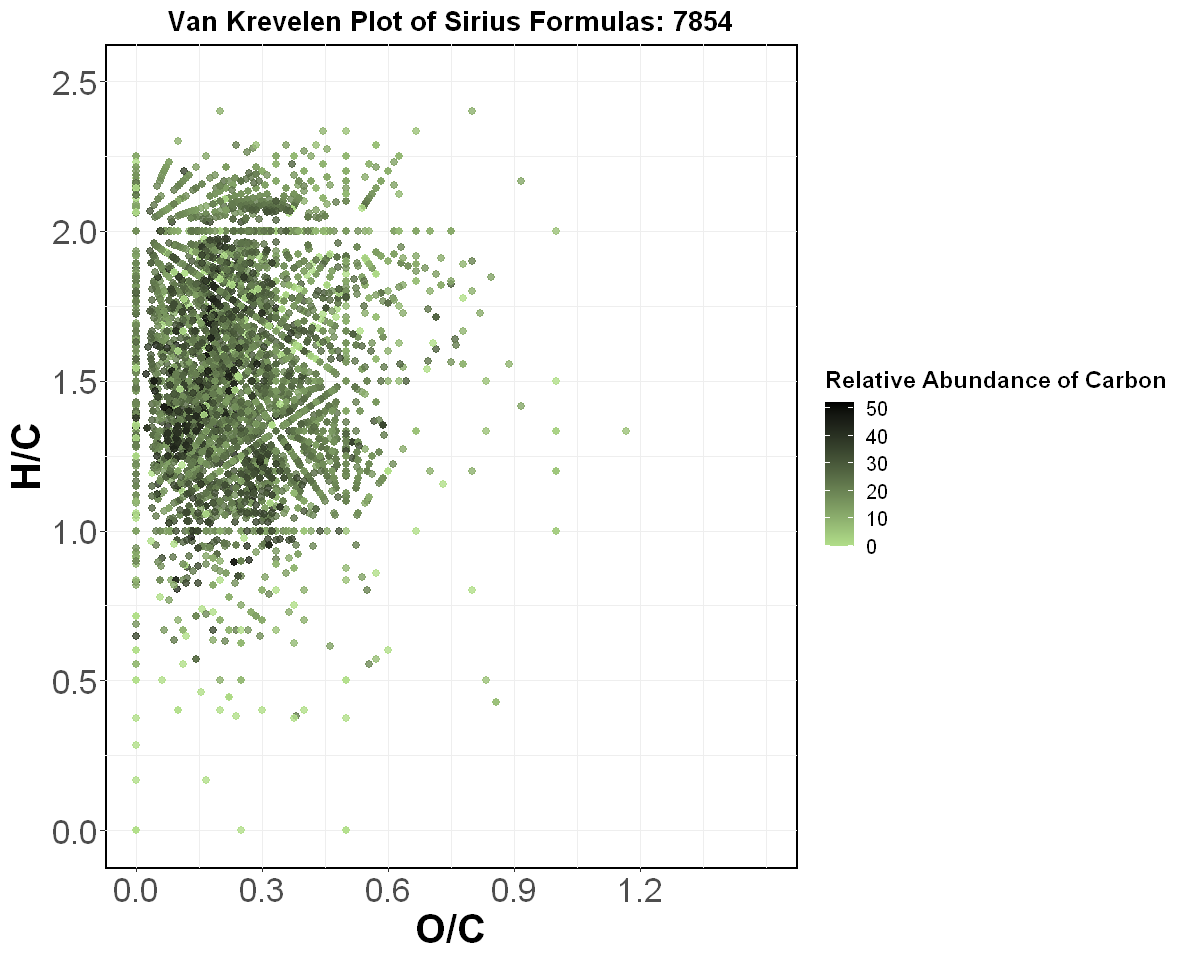

In [43]:
# Relative abundance of Carbon

VK <- ggplot(df_vk, aes(x = O_C, y = H_C, col=C_Canopus)) +
geom_point(size = 2, na.rm = TRUE, alpha = 0.8) +
scale_color_gradient(name = "Relative Abundance of Carbon",low = ("#B2DF8A"), high = ("black")) +
theme(panel.background = element_rect(fill = "white", colour = "black",size = 1, linetype = "solid"),
      panel.grid.major = element_line(size = 0.5, linetype = 'solid',colour = "#eeeeee"), 
      panel.grid.minor = element_line(size = 0.25, linetype = 'solid',colour = "#eeeeee"),
      plot.title = element_text(size = 16, face = "bold",hjust=0.5),
        legend.title = element_text(size = 14,face = "bold"),
        legend.text = element_text(size = 12),
        axis.title = element_text(face = "bold"), 
        axis.text.x = element_text(size = 20), 
        axis.text.y = element_text(size = 20), 
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 24)) +
ggtitle(paste('Van Krevelen Plot of Sirius Formulas:',nrow(df_vk))) +
labs(x = "O/C", y = "H/C") +
scale_x_continuous(limits = c(0, 1.5), breaks = seq(0.0, 1.2, by = 0.3)) +
scale_y_continuous(limits = c(0, 2.5), breaks = seq(0.0, 2.5, by = 0.5)) 
#svglite("VK_Plot_Relative Abundance_C.svg")
VK
dev.off()

null device 
          1

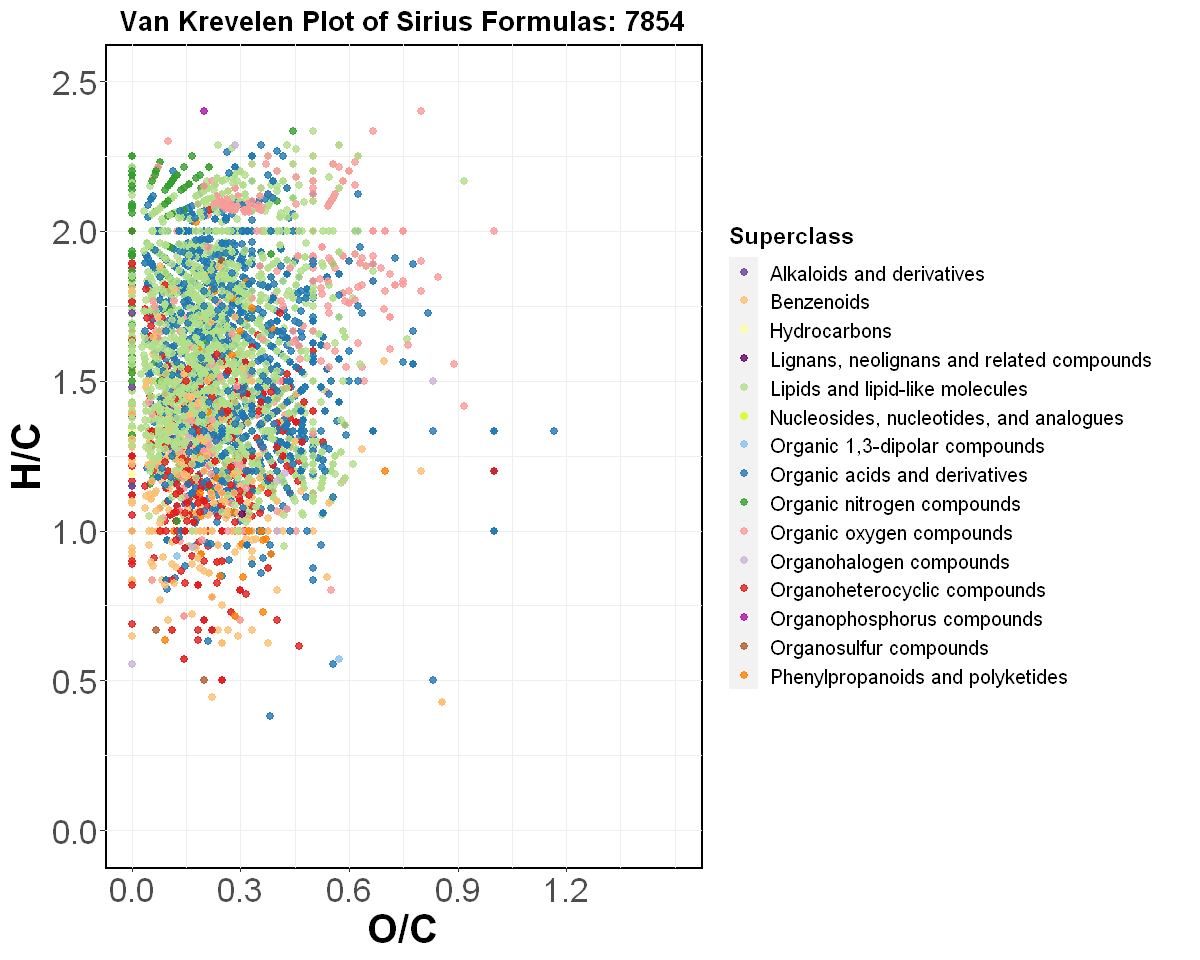

In [61]:
#Based on SuperClass
VK2 <- ggplot(df_vk2, aes(x = O_C, y = H_C, col=`ClassyFire#superclass`)) +
geom_point(size = 2, na.rm = TRUE, alpha = 0.8) +
theme(panel.background = element_rect(fill = "white", colour = "black",size = 1, linetype = "solid"),
      panel.grid.major = element_line(size = 0.5, linetype = 'solid',colour = "#eeeeee"), 
      panel.grid.minor = element_line(size = 0.25, linetype = 'solid',colour = "#eeeeee"),
      plot.title = element_text(size = 16, face = "bold",hjust=0.5),
        legend.title = element_text(size = 14,face = "bold"),
        legend.text = element_text(size = 12),
        axis.title = element_text(face = "bold"), 
        axis.text.x = element_text(size = 20), 
        axis.text.y = element_text(size = 20), 
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 24)) +
ggtitle(paste('Van Krevelen Plot of Sirius Formulas:',nrow(df_vk))) +
labs(x = "O/C", y = "H/C") +
scale_x_continuous(limits = c(0, 1.5), breaks = seq(0.0, 1.2, by = 0.3)) +
scale_y_continuous(limits = c(0, 2.5), breaks = seq(0.0, 2.5, by = 0.5)) +
scale_color_manual('Superclass',, values = stack_colors)

#svglite("Van_Krevelen_Plot_Sirius_formula_withoutNA_with_SuperClass_Lables.svg")
VK2
dev.off()

null device 
          1

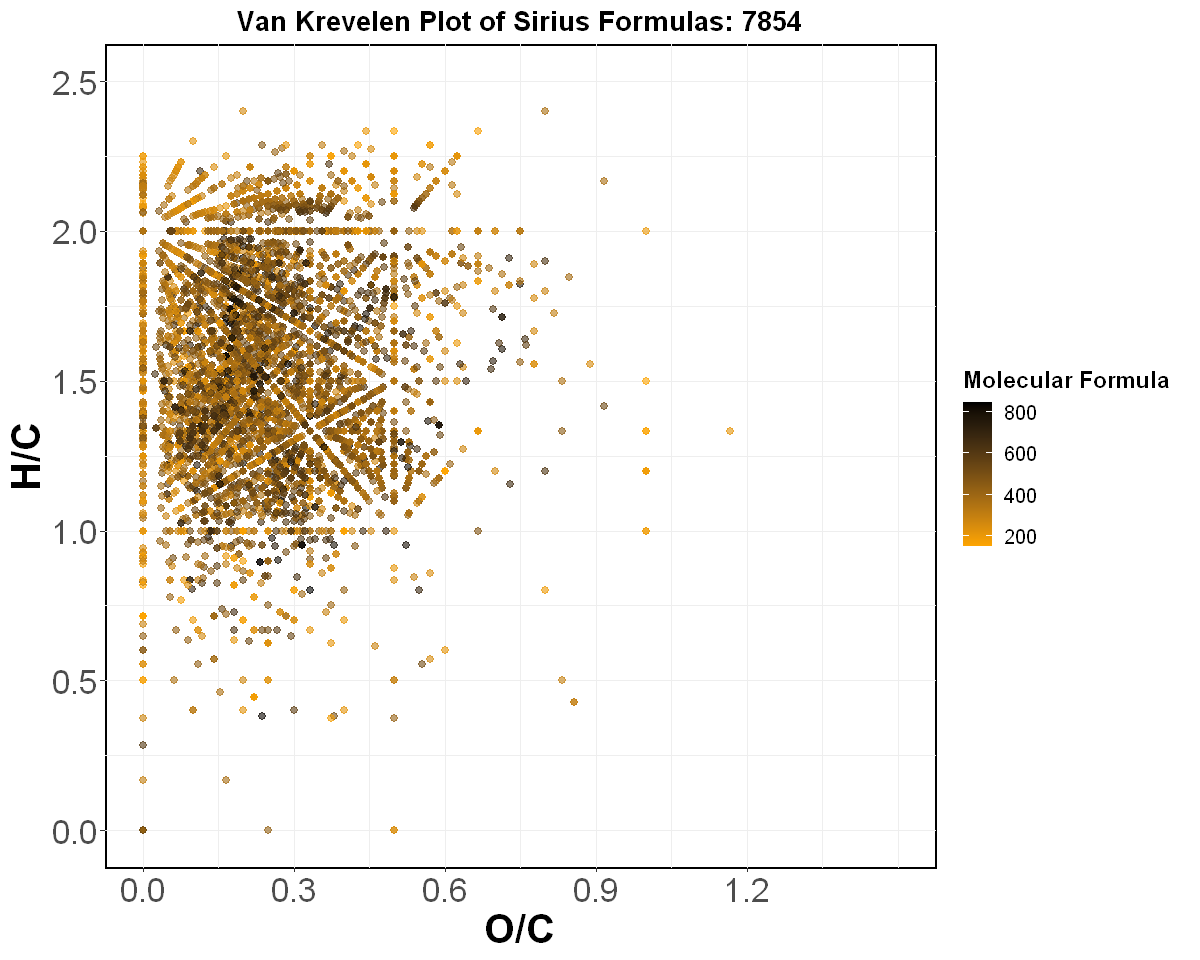

In [62]:
#Molecular Formula
VK3 <- ggplot(df_vk, aes(x = O_C, y = H_C,color = ionMass)) +
geom_point( size = 2, na.rm = TRUE, alpha = 0.6) +
scale_color_gradient(name = "Molecular Formula",
                       low = ("orange"), high = ("black")) +
theme(panel.background = element_rect(fill = "white", colour = "black",size = 1, linetype = "solid"),
      panel.grid.major = element_line(size = 0.5, linetype = 'solid',colour = "#eeeeee"), 
      panel.grid.minor = element_line(size = 0.25, linetype = 'solid',colour = "#eeeeee"),
      plot.title = element_text(size = 16, face = "bold",hjust=0.5),
        legend.title = element_text(size = 14,face = "bold"),
        legend.text = element_text(size = 12),
        axis.title = element_text(face = "bold"), 
        axis.text.x = element_text(size = 20), 
        axis.text.y = element_text(size = 20), 
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 24)) +
ggtitle(paste('Van Krevelen Plot of Sirius Formulas:',nrow(df_vk))) +
labs(x = "O/C", y = "H/C") +
scale_x_continuous(limits = c(0, 1.5), breaks = seq(0.0, 1.2, by = 0.3)) +
scale_y_continuous(limits = c(0, 2.5), breaks = seq(0.0, 2.5, by = 0.5))

#svglite("VK_Plot_Molecular_formula.svg")
VK3
dev.off()

null device 
          1

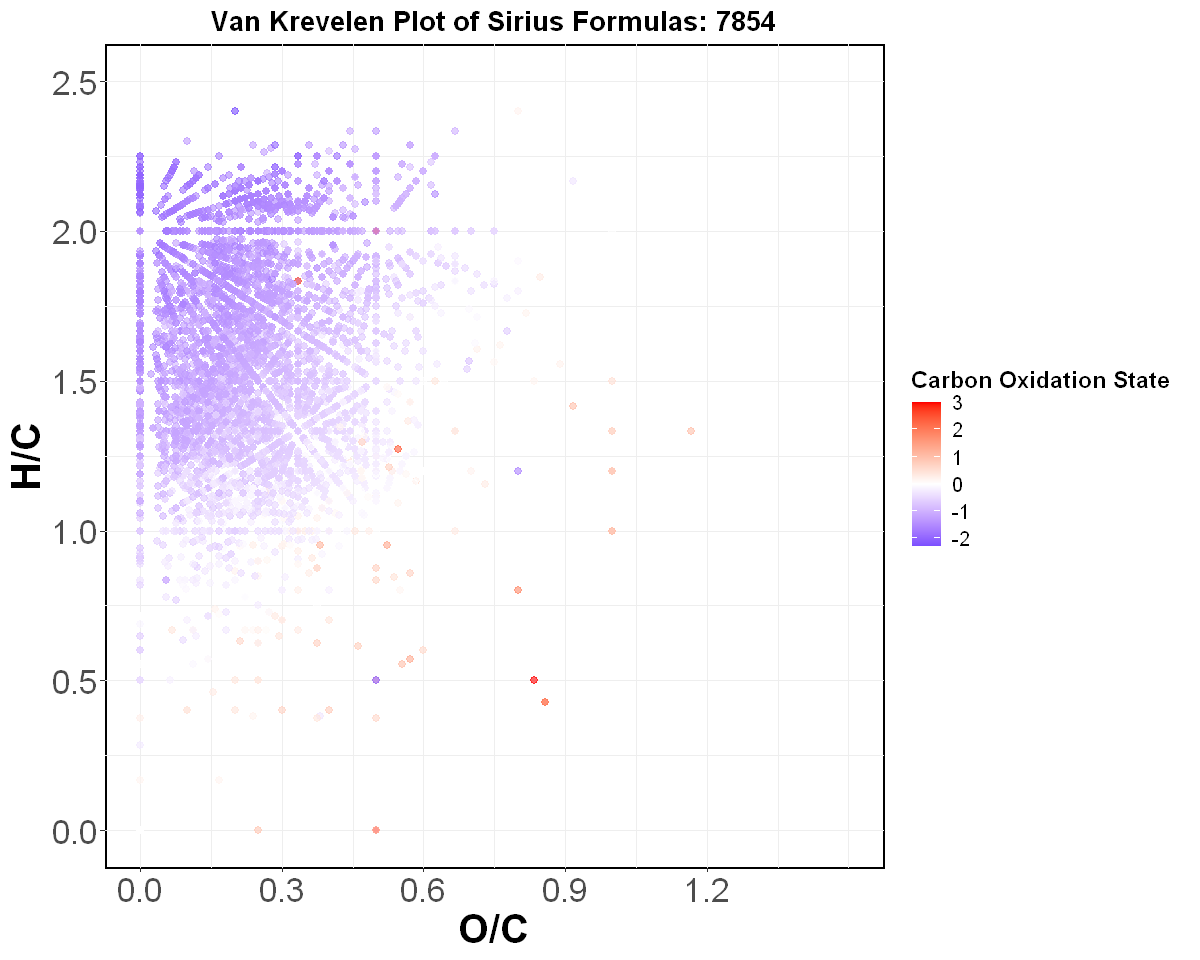

In [60]:
#Avg Oxidation State

VK4 <- ggplot(df_vk, aes(x = O_C, y = H_C)) +
    geom_point(aes(color = avCox), size = 2, na.rm = TRUE, alpha = 0.6) +
    scale_color_gradient2(name = "Carbon Oxidation State",
                        low = ("blue"), mid = ("white"), high = ("red"), midpoint = 0) +
    theme(panel.background = element_rect(fill = "white", colour = "black",size = 1, linetype = "solid"),
      panel.grid.major = element_line(size = 0.5, linetype = 'solid',colour = "#eeeeee"), 
      panel.grid.minor = element_line(size = 0.25, linetype = 'solid',colour = "#eeeeee"),
      plot.title = element_text(size = 16, face = "bold",hjust=0.5),
        legend.title = element_text(size = 14,face = "bold"),
        legend.text = element_text(size = 12),
        axis.title = element_text(face = "bold"), 
        axis.text.x = element_text(size = 20), 
        axis.text.y = element_text(size = 20), 
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 24)) +
    ggtitle(paste('Van Krevelen Plot of Sirius Formulas:',nrow(df_vk))) +
    labs(x = "O/C", y = "H/C") +
    scale_x_continuous(limits = c(0, 1.5), breaks = seq(0.0, 1.2, by = 0.3)) +
    scale_y_continuous(limits = c(0, 2.5), breaks = seq(0.0, 2.5, by = 0.5))

#svglite("VK_Plot_C_OxiState.svg")
VK4
dev.off()

## References:
1. <i>Anal. Chem.</i> 2018, 90, 10, 6152–6160 https://doi.org/10.1021/acs.analchem.8b00529
2. <i> J. Geophys. Res. </i> 2008, 113, G03010 https://doi.org/10.1029/2007JG000534.